In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import seaborn as sns
import numpy as np
import random
import matplotlib.pyplot as plt
import statsmodels.api as sm
from random import gauss
from sklearn import linear_model
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
#from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.decomposition import PCA
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs


In [2]:
lm = LinearRegression()

In [3]:
x_train=pd.read_csv("x_train.csv")
x_test=pd.read_csv("x_test.csv")
y_train=pd.read_csv("y_train.csv")
y_test=pd.read_csv("y_test.csv")

### The OLS MODEL:
#### The OLS model is the primary model that is use to run the training and the test of the dataset to figure out how your data looks like at an innitail stage. basically before running any model it is the OLS that you run first to determine the MSE, traing and test errors.

In [4]:
ols=sm.OLS(y_train,x_train)
ols = ols.fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        'violentPerPop'   R-squared (uncentered):                   0.686
Model:                            OLS   Adj. R-squared (uncentered):              0.649
Method:                 Least Squares   F-statistic:                              18.21
Date:                Wed, 11 May 2022   Prob (F-statistic):                   2.06e-154
Time:                        01:39:35   Log-Likelihood:                         -797.73
No. Observations:                 951   AIC:                                      1799.
Df Residuals:                     849   BIC:                                      2295.
Df Model:                         102                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
'State'                   0.0072      0.028      0.255      0.799      -0.049       0.063
'pop'                     1.4761      0.555      2.658      0.008       0.386       2.566
'perHoush'               -0.2435      0.101     -2.419      0.016      -0.441      -0.046
'pctBlack'                0.1136      0.106      1.069      0.286      -0.095       0.322
'pctWhite'               -0.0440      0.121     -0.364      0.716      -0.281       0.193
'pctAsian'                0.1180      0.062      1.911      0.056      -0.003       0.239
'pctHisp'                 0.1391      0.104      1.331      0.184      -0.066       0.344
'pct1221'                 0.1062      0.144      0.736      0.462      -0.177       0.389
'pct1229'                 0.2288      0.201      1.141      0.254      -0.165       0.622
'pct1624'                -0.2125      0.286     -0.743      0.458      -0.774       0.349
'pct65up'                 0.0649      0.139      0.468      0.640      -0.207       0.337
'persUrban'              -1.2746      0.551     -2.312      0.021      -2.357      -0.192
'pctUrban'                0.1772      0.055      3.233      0.001       0.070       0.285
'medIncome'              -0.7782      0.247     -3.147      0.002      -1.264      -0.293
'pctWwage'               -0.2591      0.115     -2.259      0.024      -0.484      -0.034
'pctWfarm'                0.0025      0.028      0.090      0.928      -0.052       0.057
'pctWdiv'                -0.2177      0.090     -2.417      0.016      -0.394      -0.041
'pctWsocsec'             -0.0779      0.120     -0.651      0.515      -0.313       0.157
'pctPubAsst'              0.0270      0.068      0.397      0.691      -0.106       0.160
'pctRetire'              -0.0861      0.043     -2.002      0.046      -0.170      -0.002
'medFamIncome'            0.9757      0.264      3.690      0.000       0.457       1.495
'perCapInc'              -0.5061      0.272     -1.863      0.063      -1.039       0.027
'whitePerCap'             0.4126      0.227      1.816      0.070      -0.033       0.858
'blackPerCap'            -0.0309      0.029     -1.052      0.293      -0.089       0.027
'NAperCap'                0.0031      0.021      0.146      0.884      -0.039       0.045
'asianPerCap'             0.0247      0.024      1.031      0.303      -0.022       0.072
'otherPerCap'             0.0161      0.023      0.711      0.477      -0.028       0.061
'hispPerCap'             -0.0404      0.029     -1.372      0.170      -0.098       0.017
'persPoverty'            -0.1014      0.119     -0.855      0.393      -0.334       0.131
'pctPoverty'             -0.1267      0.102     -1.245      0.214      -0.326       0.073
'pctLowEdu'   

In [5]:
x_train

,'State','pop','perHoush','pctBlack','pctWhite','pctAsian','pctHisp','pct1221','pct1229','pct1624',...,'persEmergShelt','persHomeless','pctForeignBorn','pctBornStateResid','pctSameHouse5','pctSameCounty5','pctSameState5','landArea','popDensity','pctUsePubTrans'
0,0.297813,-0.355051,1.218397,-0.571794,0.498565,0.744900,-0.442925,-0.443241,-0.991433,-0.514758,...,-0.163936,-0.138286,0.355253,-0.389608,1.285377,0.089562,0.184280,-0.273203,-0.312734,1.382337
1,0.844267,-0.242358,0.356753,-0.612731,0.731356,0.132760,-0.513599,-0.781028,-1.014330,-0.592008,...,-0.203443,-0.138286,0.082011,0.981635,1.842052,1.222803,1.124568,-0.216781,-0.192079,0.177564
2,1.234592,0.571431,-0.258707,0.991716,-0.986632,-0.371355,0.549937,1.271147,1.152760,1.320346,...,-0.049008,-0.099995,-0.342904,0.889244,-0.851959,-0.287874,0.585721,0.717616,-0.499169,-0.463316
3,1.234592,-0.156618,-0.504891,0.236893,-0.027212,-0.401362,-0.270701,0.310997,0.174707,0.211387,...,-0.199851,-0.138286,-0.535100,0.312679,-0.608065,-0.215937,0.119619,0.169913,-0.677320,-0.621456
4,-0.560902,-0.065193,-0.504891,0.204575,0.167498,-0.331346,-0.525263,1.648266,1.525663,1.722043,...,-0.102881,-0.119140,-0.700667,0.593360,-0.928293,-0.415865,0.147908,0.050189,-0.486813,-0.563194
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
946,-1.263487,-0.332569,0.818348,-0.592622,-0.083721,-0.273333,1.802849,0.172181,-0.019922,-0.277860,...,-0.099289,-0.138286,-0.054610,-0.383760,0.160855,-0.170159,0.079205,-0.149351,-0.641668,-0.502851
947,1.234592,-0.326491,-0.320253,-0.474120,0.536033,-0.429368,-0.131412,-0.003654,-0.369928,-0.202327,...,-0.135204,-0.138286,-0.516575,0.844218,-0.540109,-0.534515,0.923848,-0.130085,-0.655971,-0.523659
948,-1.185422,0.070123,-0.504891,0.222529,0.028068,-0.149304,-0.326965,-0.584371,0.035686,-0.128511,...,0.026413,-0.138286,0.090115,0.580495,0.710083,0.852841,0.499506,-0.208525,0.737476,0.075606
949,-1.341552,-0.144249,-0.751075,-0.632841,0.550160,-0.359352,0.182845,-0.595939,-1.069939,-0.755090,...,-0.045417,-0.138286,-0.027981,-0.685492,-0.442365,-0.148671,0.609969,0.015786,-0.543105,-0.596486


#### The correlation of the X train dataset with the whole datasets

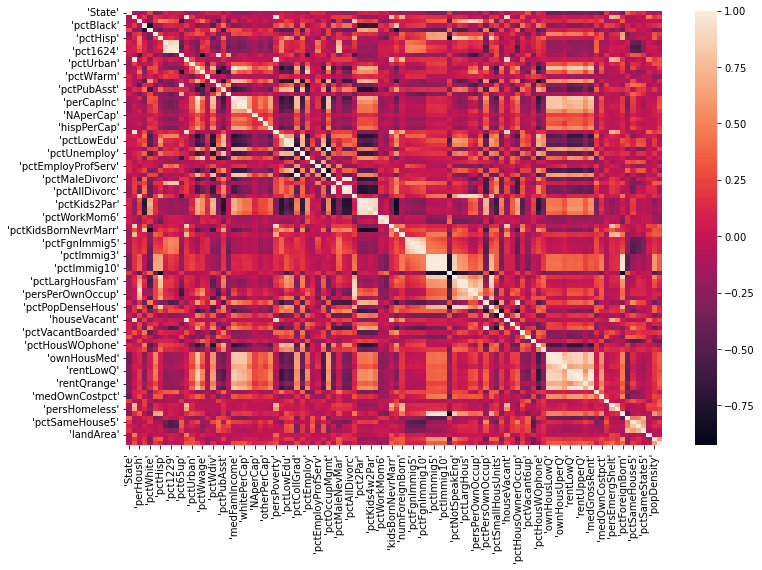

In [6]:
fig_dims = (12, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.heatmap(x_train.corr(), ax=ax)
plt.show()

<p> I select random values of 10 from the training dataset and apply random state of 2 so i will have the exact training and test correlation any time i run my codesbecause if you don't specify the random_state, then every time the code execute a new random values will be generated and we dont want that because we want to keep track of the performance of our datasets. </p>

In [7]:
# rs=np.random.RandomState(2)
# x_train=pd.DataFrame(rs.rand(15,15))
# corr=x_train.corr()
# corr.style.background_gradient()

In [8]:
x_train.describe()

,'State','pop','perHoush','pctBlack','pctWhite','pctAsian','pctHisp','pct1221','pct1229','pct1624',...,'persEmergShelt','persHomeless','pctForeignBorn','pctBornStateResid','pctSameHouse5','pctSameCounty5','pctSameState5','landArea','popDensity','pctUsePubTrans'
count,9.510000e+02,9.510000e+02,9.510000e+02,9.510000e+02,9.510000e+02,9.510000e+02,9.510000e+02,9.510000e+02,9.510000e+02,9.510000e+02,...,9.510000e+02,9.510000e+02,9.510000e+02,9.510000e+02,9.510000e+02,9.510000e+02,9.510000e+02,9.510000e+02,9.510000e+02,9.510000e+02
mean,3.154588e-12,1.472135e-11,1.682440e-11,-1.787593e-11,-8.412223e-12,1.261829e-11,-1.577288e-11,-1.564352e-17,4.206104e-12,-2.103052e-11,...,1.324922e-10,1.819137e-10,1.261830e-11,8.412201e-12,-6.309125e-12,1.051525e-11,2.103052e-12,-1.156676e-11,5.257613e-12,-1.366983e-11
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.653812e+00,-3.749341e-01,-2.535909e+00,-6.701871e-01,-4.974183e+00,-5.433942e-01,-5.636877e-01,-1.970226e+00,-2.746367e+00,-1.476085e+00,...,-2.034427e-01,-1.382858e-01,-8.569706e-01,-2.964269e+00,-3.214571e+00,-4.275238e+00,-6.349239e+00,-3.502666e-01,-9.217103e-01,-6.214557e-01
25%,-9.512271e-01,-3.325491e-01,-6.279828e-01,-6.037540e-01,-4.660759e-01,-4.323689e-01,-5.077663e-01,-5.045514e-01,-5.220330e-01,-4.529586e-01,...,-2.034427e-01,-1.382858e-01,-6.254092e-01,-6.781824e-01,-6.238898e-01,-5.004147e-01,-4.050836e-01,-2.621939e-01,-5.774995e-01,-5.486283e-01
50%,2.197476e-01,-2.527550e-01,-1.663878e-01,-4.468284e-01,3.714203e-01,-3.153422e-01,-4.120482e-01,-1.771751e-01,-1.524010e-01,-2.555433e-01,...,-2.034427e-01,-1.382858e-01,-3.579559e-01,8.345653e-02,4.728576e-02,1.801838e-01,2.718429e-01,-1.727450e-01,-2.680196e-01,-3.800850e-01
75%,8.442674e-01,-5.194969e-02,4.182993e-01,1.295232e-01,7.629890e-01,1.730153e-03,4.973193e-02,2.508434e-01,2.752926e-01,7.920439e-02,...,-1.172467e-01,-1.287131e-01,2.192108e-01,8.225826e-01,6.840182e-01,7.080331e-01,6.813666e-01,-8.296615e-03,1.800828e-01,5.167712e-02
max,1.702982e+00,1.555926e+01,5.557391e+00,6.272605e+00,9.739754e-01,1.093922e+01,5.666570e+00,8.424840e+00,7.034160e+00,8.530295e+00,...,1.661195e+01,1.997396e+01,5.724003e+00,1.915483e+00,2.520675e+00,1.817918e+00,1.391297e+00,2.384084e+01,1.469269e+01,7.139859e+00


<p>Now we want to have a visual representation of the States and the Violent rate per person within the training data</p>

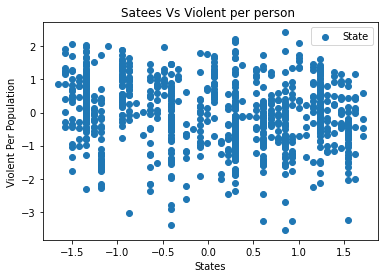

In [9]:
plt.scatter(x_train["'State'"],y_train["'violentPerPop'"])
plt.title("Satees Vs Violent per person ")
plt.legend(["State", "Violents"])
plt.xlabel("States")
plt.ylabel("Violent Per Population")
plt.show()

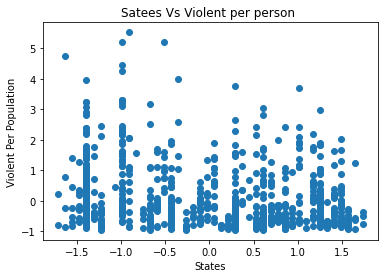

In [10]:
plt.scatter(x_test["'State'"],y_test["'violentPerPop'"])
plt.title("Satees Vs Violent per person ")
plt.xlabel("States")
plt.ylabel("Violent Per Population")
plt.show()

In [11]:
reg = lm.fit(x_train,y_train)

### THE MSE :
<P>We want to calculate the MSE, you take the difference between your model’s predictions and the ground truth, square it, and average it out across the whole dataset that will give us the MSE.</P>

In [12]:
pred_xtrain = reg.predict(x_train)
pred_xtest = reg.predict(x_test)
mse_train =mean_squared_error(y_train, pred_xtrain)
mse_test =mean_squared_error(y_test, pred_xtest)
print(f"Mean Square Error of the test set: {mse_train}")
print(f"Mean Square Error of the test set: {mse_test}")

Mean Square Error of the test set: 0.3134196154216991
Mean Square Error of the test set: 6760858957307.346


In [13]:
train_score =  reg.score(x_train, y_train)
print(f"The R square score on the training dataset is {train_score}")

The R square score on the training dataset is 0.6862504692010837


In [14]:
test_score = reg.score(x_test, y_test)
print(f"The R square score on the test dataset is {test_score}")

The R square score on the test dataset is -6767975651107.805


<p> After fitting our model we realise that the OLS gives a very poor performance by the test score of -68 so therefore we will need to improve our model by using the models like Ridge, Lasso Stepwise and so on. </p>
<p><strong>The R square score on the training: 0.6862504692010837</strong></p>
<p><strong>The R square score on the test: -6767975651107.805</strong></p>
<p><strong>Mean Square Error of the training set: 0.3134196154216991</strong></p>
<p><strong>Mean Square Error of the test set: 6760858957307.346</strong></p>

### Lasso Regression
<p> The lasso regression allows us to shrink or regularize these coefficients we have from the previous model to avoid overfitting and make them work better .The goal of lasso regression is to obtain the subset of predictors that minimizes prediction error for a quantitative response variables. This is done by imposing a constraint (penalty term) on the model parameters that causes regression coefficients for some variables to shrink toward zero by adding the penalty term </p>

   <p> $\lambda$$\sum$$\beta^2$j</p>

In [15]:
Lx = x_train
Ly = y_train

<p>I perform the Lasso regression with the Gridsearch cross validation to search the best alpha value for me </p>

In [16]:
lasso=Lasso()
params={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
lasso_regressor=GridSearchCV(lasso,params,scoring='neg_mean_squared_error',cv=10)
lasso_regressor.fit(Lx,Ly)
lasso_regressor.best_params_

{'alpha': 0.01}

In [17]:
lasso_reg = Lasso(alpha=0.01,max_iter=500, tol= 0.1 )
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.01, max_iter=500, tol=0.1)

In [18]:
lasso_reg.score(x_train,y_train)

0.65033156284333

In [19]:
lsr = lasso_reg.score(x_test,y_test)
lsr

0.5702641969383277

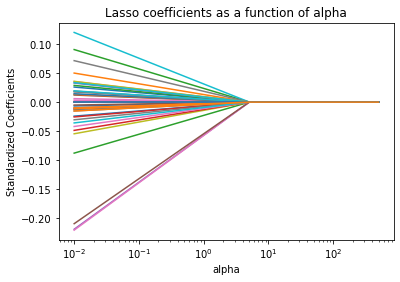

In [20]:
alphas = np.linspace(0.01,500,100)
lasso = Lasso(max_iter=1000)
coefs = []

for alpha in alphas:
    lasso.set_params(alpha=alpha)
    lasso.fit(x_train, y_train)
    coefs.append(lasso.coef_)

alp_val = plt.gca()
alp_val.plot(alphas, coefs)
alp_val.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Standardized Coefficients')
plt.title('Lasso coefficients as a function of alpha');

### Ridge Regression

<p>Just like the Lasso The Ridge regression allows us to shrink or regularize the coefficients we have from the previous model to avoid overfitting and make them work better .The goal of ridge regression is to obtain the subset of predictors that minimizes prediction error for a quantitative response variables. This is done by imposing a constraint (penalty term) on the model parameters that causes regression coefficients for some variables to shrink towards zero by adding the penalty term </p>

   <p> $\lambda$$\sum$|$\beta$|j</p>
A problem with linear regression is that estimated coefficients of the model can become large, making the model sensitive to inputs and possibly unstable
I am using the same alpha value for both Ridge and Lasso

In [21]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=0.01,max_iter=500, tol= 0.1 )
ridge.fit(x_train, y_train)

Ridge(alpha=0.01, max_iter=500, tol=0.1)

In [22]:
ridge.score(x_train, y_train)

0.6856418547542262

In [23]:
ridge.score(x_test, y_test)

0.5391689797922727

In [24]:
# Option 2 for ridge

In [25]:
Rx = x_train
Ry = y_train

In [26]:
ridge=Ridge()
params={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
ridge_regressor=GridSearchCV(ridge,params,scoring='neg_mean_squared_error',cv=10)
# predict_lasso=predict_lasso.reshape(286,1)
# ridge_regressor.fit(Rx,Ry)

In [27]:
ridge_regressor.fit(Rx, Ry)

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [28]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 100}
-0.38039544546740134


In [29]:
X_train, X_test, y_train, y_test = train_test_split(Rx, Ry, test_size=0.3, random_state=0)

In [30]:
predict_ridge=ridge_regressor.predict(X_test)
predict_ridge = predict_ridge.reshape(286,1)

<AxesSubplot:ylabel='Density'>

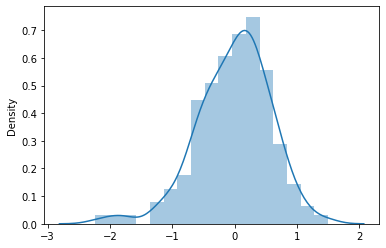

In [31]:
sns.distplot(y_test-predict_ridge)

### forward stepwise

<p>In forward selection, we start with a null model and then start fitting the model with each individual feature one at a time and select the feature with the minimum p-value. Now fit a model with two features by trying combinations of the earlier selected feature with all other remaining features. Again select the feature with the minimum p-value. Now fit a model with three features by trying combinations of two previously selected features with other remaining features. Repeat this process until we have a set of selected features with a p-value of individual features less than the significance level</p>

In [32]:
x_train=pd.read_csv("x_train.csv")
x_test=pd.read_csv("x_test.csv")
y_train=pd.read_csv("y_train.csv")
y_test=pd.read_csv("y_test.csv")

In [33]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
# Sequential Forward Selection(sfs)
sfs = SFS(LinearRegression(),k_features=10,forward=True,floating=False,scoring = 'r2',cv = 10)
sfs.fit(x_train, y_train)

SequentialFeatureSelector(cv=10, estimator=LinearRegression(), k_features=10,
                          scoring='r2')

In [34]:
sfs.k_feature_names_

("'pop'",
 "'pctWhite'",
 "'pctUrban'",
 "'pctWdiv'",
 "'pctAllDivorc'",
 "'pctKids2Par'",
 "'pctNotSpeakEng'",
 "'pctPopDenseHous'",
 "'pctHousOccup'",
 "'pctForeignBorn'")

These are the 5 featured names selected by our model because specify K = 5:
   "'pctWhite'",
   "'pctUrban'",
 "'pctAllDivorc'",
 "'pctKids2Par'",
 "'pctPopDenseHous'"
 <p> The model will do the following:
Choose a significance level (e.g. SL = 0.05 with a 95% confidence).

Fit all possible simple regression models by considering one feature at a time. Total ’n’ models are possible. Select the feature with the lowest p-value.

Fit all possible models with one extra feature added to the previously selected feature(s).

Again, select the feature with a minimum p-value. if p_value is less than the significance level then go to Step 3, otherwise terminate the process. </p>

In [35]:
sfs.subsets_

{1: {'feature_idx': (45,),
  'cv_scores': array([0.58427531, 0.54680115, 0.5456635 , 0.60010509, 0.39980344,
         0.50168836, 0.41346842, 0.5238546 , 0.52267543, 0.52143642]),
  'avg_score': 0.5159771731353299,
  'feature_names': ("'pctKids2Par'",)},
 2: {'feature_idx': (45, 69),
  'cv_scores': array([0.60744072, 0.60170106, 0.58669011, 0.62986888, 0.45951514,
         0.53741531, 0.47305514, 0.5854887 , 0.54603043, 0.55368789]),
  'avg_score': 0.5580893353972811,
  'feature_names': ("'pctKids2Par'", "'pctPopDenseHous'")},
 3: {'feature_idx': (42, 45, 69),
  'cv_scores': array([0.64643974, 0.6431989 , 0.6005341 , 0.62448467, 0.45202294,
         0.56464039, 0.50921128, 0.57887816, 0.57427649, 0.6117469 ]),
  'avg_score': 0.5805433562690762,
  'feature_names': ("'pctAllDivorc'", "'pctKids2Par'", "'pctPopDenseHous'")},
 4: {'feature_idx': (12, 42, 45, 69),
  'cv_scores': array([0.64524483, 0.65546094, 0.61170427, 0.63940874, 0.47219205,
         0.55474252, 0.52975813, 0.60249966, 0.

In [36]:
def forward_selection(data, target, significance_level=0.5):
    initial_features = data.columns.tolist()
    best_lst = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_lst))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_lst +[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
            min_p_value = new_pval.min()
        if(min_p_value<significance_level):
            best_lst.append(new_pval.idxmin())
#             print(min_p_value)
        else:
            break
    return min_p_value

In [37]:
forward_selection(x_test, y_test)

0.5156423362051779

### Backward Selection

Unlike the forward selection, in backward elimination, we start with the full model (including all the independent variables) and then remove the insignificant feature with the highest p-value(> significance level). This process repeats again and again until we have the final set of significant features.

The following steps involved in backward elimination are as follows:

Choose a significance level (e.g. SL = 0.05 with a 90% confidence).

Fit a full model including all the features.

Consider the feature with the highest p-value. If the p-value > significance level then go to Step 4 otherwise terminate the process.

Remove the feature which is under consideration.

Fit a model without this feature. Repeat the entire process from Step 3.

In [38]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
# Sequential Forward Selection(sfs)
lr =LinearRegression()

backward = SFS(LinearRegression(),k_features=10,forward=False,floating=False,scoring = 'r2',cv = 5)
backward.fit(x_train, y_train)
backward.k_feature_names_

("'pop'",
 "'perHoush'",
 "'pctUrban'",
 "'pctWdiv'",
 "'whitePerCap'",
 "'pctLowEdu'",
 "'pctKids2Par'",
 "'kidsBornNevrMarr'",
 "'pctPopDenseHous'",
 "'pctForeignBorn'")

In [39]:
backward.subsets_

{102: {'feature_idx': (0,
   1,
   2,
   3,
   4,
   5,
   6,
   7,
   8,
   9,
   10,
   11,
   12,
   13,
   14,
   15,
   16,
   17,
   18,
   19,
   20,
   21,
   22,
   23,
   24,
   25,
   26,
   27,
   28,
   29,
   30,
   31,
   32,
   33,
   34,
   35,
   36,
   37,
   38,
   39,
   40,
   41,
   42,
   43,
   44,
   45,
   46,
   47,
   48,
   49,
   50,
   51,
   52,
   53,
   54,
   55,
   56,
   57,
   58,
   59,
   60,
   61,
   62,
   63,
   64,
   65,
   66,
   67,
   68,
   69,
   70,
   71,
   72,
   73,
   74,
   75,
   76,
   77,
   78,
   79,
   80,
   81,
   82,
   83,
   84,
   85,
   86,
   87,
   88,
   89,
   90,
   91,
   92,
   93,
   94,
   95,
   96,
   97,
   98,
   99,
   100,
   101),
  'cv_scores': array([0.60081959, 0.63464073, 0.50178825, 0.50209077, 0.59800828]),
  'avg_score': 0.5674695243053945,
  'feature_names': ("'State'",
   "'pop'",
   "'perHoush'",
   "'pctBlack'",
   "'pctWhite'",
   "'pctAsian'",
   "'pctHisp'",
   "'pct1221'",
   "'pct122

In [40]:
def backward_elimination(data, target,significance_level = 0.05):
    features = data.columns.tolist()
    while(len(features)>0):
        features_with_constant = sm.add_constant(data[features])
        p_values = sm.OLS(target, features_with_constant).fit().pvalues[1:]
        max_p_value = p_values.max()
        if(max_p_value >= significance_level):
            excluded_feature = p_values.idxmax()
            features.remove(excluded_feature)
        else:
            break 
    return max_p_value

In [41]:
backward_elimination(x_test, y_test)

0.04664090785328903

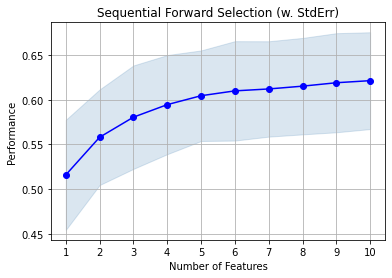

In [42]:
fig1 = plot_sfs(sfs.get_metric_dict(), kind='std_dev')
plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

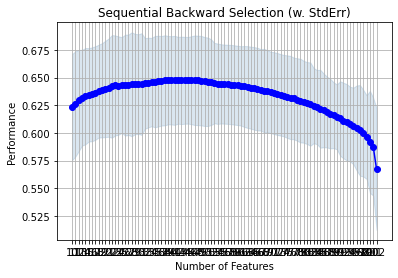

In [43]:
fig1 = plot_sfs(backward.get_metric_dict(), kind='std_dev')
plt.title('Sequential Backward Selection (w. StdErr)')
plt.grid()
plt.show()

### Principal Component Analysis

In [44]:
x_train=pd.read_csv("x_train.csv")
x_test=pd.read_csv("x_test.csv")
y_train=pd.read_csv("y_train.csv")
y_test=pd.read_csv("y_test.csv")

In [45]:
X = x_train

In [46]:
X.shape
X.values.reshape(-1,1)

array([[ 0.29781257],
       [-0.3550513 ],
       [ 1.21839735],
       ...,
       [-0.06403016],
       [-0.49502702],
       [-0.33222706]])

In [47]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 0.29796927, -0.35523812,  1.21903844, ..., -0.2733467 ,
        -0.31289883,  1.38306421],
       [ 0.84471167, -0.24248597,  0.35694098, ..., -0.21689541,
        -0.19218014,  0.17765782],
       [ 1.23524195,  0.5717317 , -0.25884292, ...,  0.71799315,
        -0.49943188, -0.46356008],
       ...,
       [-1.18604581,  0.07016018, -0.50515648, ..., -0.20863424,
         0.73786386,  0.07564588],
       [-1.34225792, -0.14432492, -0.75147004, ...,  0.01579409,
        -0.54339077, -0.59680016],
       [-1.34225792, -0.18405075, -0.28963211, ..., -0.06406385,
        -0.49528749, -0.33240187]])

In [48]:
## Use component to retained 95% of variance  
## this will randomly select 95% of the needed features 
pca = PCA(0.95)
X_pca = pca.fit_transform(X)
X_pca.shape

(951, 35)

In [49]:
X_pca

array([[11.11632032,  1.82751742, -1.6246644 , ..., -0.65551715,
         0.19133718, -0.58034807],
       [ 6.20024227, -1.99500628, -1.88098405, ...,  0.21847232,
        -0.24041288, -0.0855776 ],
       [-6.71925164, -0.0202485 ,  2.02764478, ..., -0.45932874,
         0.38367107,  0.3488712 ],
       ...,
       [ 0.53384613,  0.20200989,  0.86511989, ..., -0.2794663 ,
        -0.17834692, -0.14422695],
       [-0.20488375, -1.69666974, -0.27752738, ..., -0.59729586,
        -1.254324  ,  0.5560947 ],
       [-6.16737872,  4.52132688,  0.20809157, ..., -0.94919338,
        -0.06411649, -0.7397678 ]])

In [50]:
train_pca, test_pca, y_train, y_test = train_test_split(X_pca, y_train, test_size=0.5, random_state=30)

In [51]:
pca.explained_variance_ratio_

array([0.2446966 , 0.16264275, 0.09025687, 0.07497233, 0.05541013,
       0.0418682 , 0.0329918 , 0.03027989, 0.02109587, 0.01691884,
       0.01554812, 0.01505418, 0.0139952 , 0.01116032, 0.00995541,
       0.00936632, 0.00897942, 0.00839693, 0.00769885, 0.00720383,
       0.00681812, 0.00653454, 0.00606503, 0.00555188, 0.00539341,
       0.00523467, 0.00482474, 0.00472111, 0.00441554, 0.00421999,
       0.00410745, 0.00369348, 0.00358113, 0.00347064, 0.00332546])

In [52]:
pca_model = LinearRegression()
pca_model.fit(train_pca, y_train)
pca_model.score(test_pca, y_test)

0.5772881020646434

### Question 2

Y = X$\beta$ + $\sigma$$\epsilon$

In [53]:
n = 50
eps = pd.DataFrame(dict(Epsilon=np.random.normal(size=n),))
# eps

In [54]:
beta = [3,1.5,0.0001,0.001,2,0.01,0.0001,0.0001]
sigma = 3

In [55]:
X = np.random.normal(loc=0.0, scale=1.0, size=(n,20))
X= pd.DataFrame(X, columns=['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T'])


In [56]:
y = np.array(eps.values)*sigma
for k in range(len(beta)):
    y += beta[k]*np.array(X.iloc[:,[k]].values) + np.array(eps.values)*sigma 
    #print(y)
    y += np.array(eps.iloc[0:50,[0]].values)
y = pd.DataFrame(y).round(4)
# y.head(10)

In [57]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=30)

In [58]:
lm.fit(x_train,y_train)
lm.score(x_train,y_train)

0.6658515088624435

In [59]:
lm.score(x_test,y_test)

-0.8828520773271114

In [60]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
lm =LinearRegression()
cv = KFold(n_splits=10)
sfs = SFS(LinearRegression(),k_features=5,forward=True,floating=False,scoring = 'r2',cv = cv)
sfs.fit(x_train, y_train)
def forward_selection(data, target, significance_level=0.5):
    initial_features = data.columns.tolist()
    best_lst = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_lst))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_lst +[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<significance_level):
            best_lst.append(new_pval.idxmin())
            #print(best_lst)
        else:
            break
    return min_p_value

In [61]:
mse = {'Lasso':[],'Ridge':[],'PCA':[]}
num_of_simulation = 0
all_stats = []
for x in range(200):
    num_of_simulation +=1
    n = 50
    eps = pd.DataFrame(dict(Epsilon=np.random.normal(size=n),))
    beta = [3,1.5,0.0001,0.001,2,0.01,0.0001,0.0001]
    sigma = 3
    X = np.random.normal(loc=0.0, scale=1.0, size=(n,20))
    X= pd.DataFrame(X, columns=['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T'])
    y = np.array(eps.values)*sigma
    for k in range(len(beta)):
        y += beta[k]*np.array(X.iloc[:,[k]].values) + np.array(eps.values)*sigma 
        #print(y)
        y += np.array(eps.iloc[0:50,[0]].values)
    y = pd.DataFrame(y).round(4)
    #y.head(10)
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=30)  
    #Lasso regression
    lasso_reg = Lasso(alpha=0.01,max_iter=100, tol= 0.1 )
    lasso_reg.fit(x_train, y_train)
    y_predict = lasso_reg.predict(x_test)
    lasso_mse = mean_squared_error(y_test,y_predict)
    mse["Lasso"].append(lasso_mse)
    print(f"MSE for Lasso: {lasso_mse}")
     #Ridge regression
    ridge_reg = Ridge(alpha=0.01,max_iter=100, tol= 0.1 )
    ridge_reg.fit(x_train, y_train)
    y_predict = ridge_reg.predict(x_test)
    ridge_mse = mean_squared_error(y_test,y_predict)
    mse["Ridge"].append(ridge_mse)
    print(f"MSE for Ridge {ridge_mse}")
    #principal component (PCA)
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(x_train)
    pca = PCA(0.95)
    X_pca = pca.fit_transform(x_train)
    pca_model = LinearRegression()
    pca_model.fit(x_train, y_train)
    pca_ypred = pca_model.predict(x_test)
    pca_score = pca_model.score(x_test, y_test)
    pca_mse = mean_squared_error(y_test,pca_ypred)
    mse["PCA"].append(pca_mse)
    print(f'PCA score {pca_mse}')
mse=pd.DataFrame(mse)
    

MSE for Lasso: 5712.335119938398
MSE for Ridge 6347.575760748119
PCA score 6429.77424225744
MSE for Lasso: 2651.2869841311935
MSE for Ridge 2688.489856525555
PCA score 2699.885678077083
MSE for Lasso: 1194.2736126138036
MSE for Ridge 1220.7556750343815
PCA score 1226.9727655657716
MSE for Lasso: 5641.254181751032
MSE for Ridge 5880.317714830398
PCA score 5933.797492053001
MSE for Lasso: 2610.465236408684
MSE for Ridge 2680.618041915784
PCA score 2696.156149791498
MSE for Lasso: 2465.5257923277895
MSE for Ridge 3146.2311357608983
PCA score 3154.741966185072
MSE for Lasso: 4792.409231060321
MSE for Ridge 4799.6273344154815
PCA score 4807.329936872893
MSE for Lasso: 4301.492298642849
MSE for Ridge 4380.66857242014
PCA score 4395.014560866613
MSE for Lasso: 2697.8493480204847
MSE for Ridge 2566.8273364576908
PCA score 2555.427359911673
MSE for Lasso: 6722.049951032706
MSE for Ridge 6795.8882994587275
PCA score 6849.89619907834
MSE for Lasso: 2324.940122102455
MSE for Ridge 2471.94926097906

MSE for Ridge 2640.7002815532046
PCA score 2659.5261817883297
MSE for Lasso: 2305.318482122285
MSE for Ridge 2333.8238279651605
PCA score 2347.1936327499875
MSE for Lasso: 1916.8674034013486
MSE for Ridge 3773.808142602501
PCA score 3815.8950462940484
MSE for Lasso: 2090.2432338848953
MSE for Ridge 2241.811199694155
PCA score 2243.205721479275
MSE for Lasso: 4982.317596732927
MSE for Ridge 5794.585513063274
PCA score 5817.5602342557295
MSE for Lasso: 2845.4387380596745
MSE for Ridge 2894.6327747387445
PCA score 2898.1125672597736
MSE for Lasso: 1616.4686535909823
MSE for Ridge 1709.9678521286146
PCA score 1712.0217792532997
MSE for Lasso: 2580.3349615690604
MSE for Ridge 2632.8800845828423
PCA score 2638.174113109418
MSE for Lasso: 1763.5126911586067
MSE for Ridge 1754.6401325916136
PCA score 1755.5390503158549
MSE for Lasso: 1765.9512039500755
MSE for Ridge 1836.3800863838685
PCA score 1853.0509295260654
MSE for Lasso: 2858.6272719875
MSE for Ridge 2892.040499686663
PCA score 2903.340

MSE for Ridge 3281.2516981583467
PCA score 3298.63790352007
MSE for Lasso: 4894.460264373918
MSE for Ridge 4918.83822778385
PCA score 4940.6912891953525
MSE for Lasso: 4036.560693368306
MSE for Ridge 4373.500105624904
PCA score 4395.987728437948
MSE for Lasso: 5107.26440077208
MSE for Ridge 5157.608984894677
PCA score 5191.227640373254
MSE for Lasso: 2249.7217036213024
MSE for Ridge 2266.7076355322133
PCA score 2279.032837465095
MSE for Lasso: 3709.1135202424753
MSE for Ridge 7430.290341412483
PCA score 7510.071391088439
MSE for Lasso: 1742.5450520587424
MSE for Ridge 1740.6309593245346
PCA score 1740.6072188393923
MSE for Lasso: 2699.4802306661118
MSE for Ridge 2709.3347094827022
PCA score 2710.6168243920274
MSE for Lasso: 2472.086389706079
MSE for Ridge 2804.4950919821345
PCA score 2858.5229908843075
MSE for Lasso: 2471.3415792509736
MSE for Ridge 2482.940381895142
PCA score 2489.8183546384607
MSE for Lasso: 5869.091470938312
MSE for Ridge 6373.284337228208
PCA score 6447.95316557691

In [62]:
mse.describe()

,Lasso,Ridge,PCA
count,200.000000,200.000000,200.000000
mean,3934.228225,4365.462254,4398.160083
std,2080.755335,2457.079221,2513.404790
min,950.238256,957.705749,959.103515
25%,2474.426474,2632.552741,2637.988464
50%,3430.792964,3766.100136,3788.568804
75%,5085.310774,5584.044023,5597.421211
max,16627.008728,18229.238630,19010.984542


In [63]:
mse

,Lasso,Ridge,PCA
0,5712.335120,6347.575761,6429.774242
1,2651.286984,2688.489857,2699.885678
2,1194.273613,1220.755675,1226.972766
3,5641.254182,5880.317715,5933.797492
4,2610.465236,2680.618042,2696.156150
...,...,...,...
195,2451.872969,2495.602702,2498.908472
196,2807.343738,4522.086324,4543.881797
197,2391.613064,3018.970927,3031.505918
198,6374.151420,6412.495257,6429.763970


<AxesSubplot:>

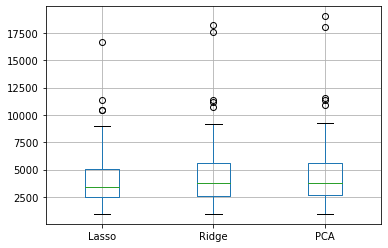

In [64]:
mse.boxplot()